In [1]:
import numpy as np
import pandas as pd
import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re,string,unicodedata
from nltk.stem import WordNetLemmatizer,PorterStemmer
import os
import gc
from nltk.tokenize import word_tokenize
from collections import  Counter
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acpto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv("fbpac-ads-en-US.csv")
df = df.loc[0:79999]

In [5]:
df.head(3)

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
0,hyperfeed_story_id_5c9baa3ee0ec08073500042,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,en-US,...,f,[],NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",https://www.facebook.com/LCVoters/,https://www.facebook.com/lcvoters/,NaN,League of Conservation Voters,NaN,0.647945
1,hyperfeed_story_id_5c9bb2a2413852086735771,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,en-US,...,f,[],NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/indivisibleguide/,https://www.facebook.com/indivisibleguide/,NaN,Indivisible Project,NaN,0.350635
2,hyperfeed_story_id_5c9bb4fa461731e29426627,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,en-US,...,f,[],NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,NaN,International Rescue Committee,NaN,0.999909


In [6]:
df.columns

Index(['id', 'html', 'political', 'not_political', 'title', 'message',
       'thumbnail', 'created_at', 'updated_at', 'lang', 'images',
       'impressions', 'political_probability', 'targeting', 'suppressed',
       'targets', 'advertiser', 'entities', 'page', 'lower_page', 'targetings',
       'paid_for_by', 'targetedness', 'listbuilding_fundraising_proba'],
      dtype='object')

In [7]:
fe = ['title','message','paid_for_by']
text_df = df[fe]
text_df.head(3)

,title,message,paid_for_by
0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,League of Conservation Voters
1,Indivisible Guide,<p>The Mueller investigation is over. Special ...,Indivisible Project
2,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,International Rescue Committee


In [8]:
text_df.shape

(80000, 3)

In [9]:
from nltk.stem import SnowballStemmer
import time
stemmer = SnowballStemmer("english")

def cleanText(message):
    
    try:
        message = message.translate(str.maketrans('', '', string.punctuation))
        words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
        return " ".join(words)
    except:
        print(message)
        

t1 = time.time()
text_df["message"].fillna(' ')
text_df["message"] = text_df["message"].apply(cleanText)
text_df.head(n = 10)    
t2 = time.time()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
text_df.head(n = 10)

,title,message,paid_for_by
0,League of Conservation Voters,pbreak trump depart interior plan remov endang...,League of Conservation Voters
1,Indivisible Guide,pthe mueller investig special counsel robert m...,Indivisible Project
2,International Rescue Committee,pzimbabw reel impact cyclon idai famili strand...,International Rescue Committee
3,Covenant House International,pwhat final hour 2018 help us rescu one kid st...,Covenant House International
4,Planned Parenthood,psay loud say proud right health care plan par...,Planned Parenthood Federation of America
5,FWD.us,pflorida senat bill 168 would damag florida ec...,FWD.us
6,The Women's Building NYC,pthe women build transform former bayview corr...,The Women's Building NYC
7,Brut,plock like hillari clinton — trump offici use ...,Brut
8,American Medical Association (AMA),pclick see ama member drive futur medicinep,American Medical Association
9,Amy Klobuchar,pami klobuchar first ever presidenti fec deadl...,Amy for America


In [11]:
t2 - t1

892.7860524654388

In [12]:
stop=set(stopwords.words('english'))

def build_list(df,col="title"):
    corpus=[]
    lem=WordNetLemmatizer()
    stop=set(stopwords.words('english'))
    new= df[col].dropna().str.split()
    new=new.values.tolist()
    corpus=[lem.lemmatize(word.lower()) for i in new for word in i if(word) not in stop]
    
    return corpus

In [13]:
corpus=build_list(text_df)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

Text(0.5, 1.0, 'most common word in title')

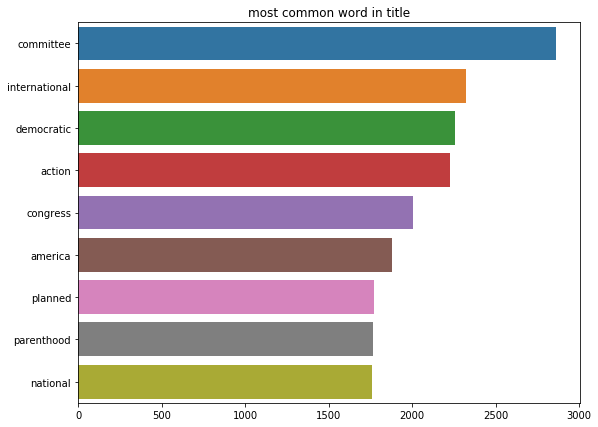

In [14]:
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)
plt.title("most common word in title")

In [15]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acpto\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Text(0.5, 1.0, 'most common word in paid_for_by')

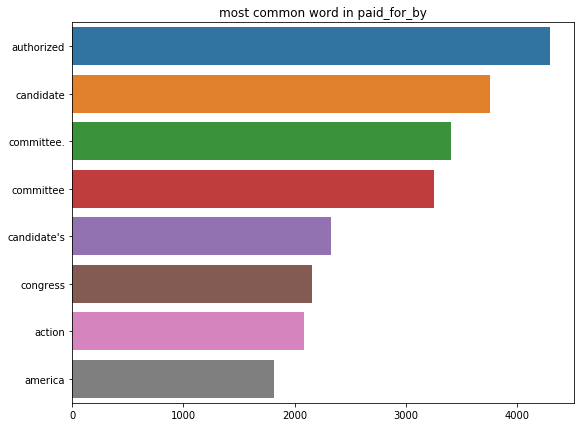

In [16]:
corpus=build_list(text_df,"paid_for_by")
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)
plt.title("most common word in paid_for_by")

Text(0.5, 1.0, 'most common word in message')

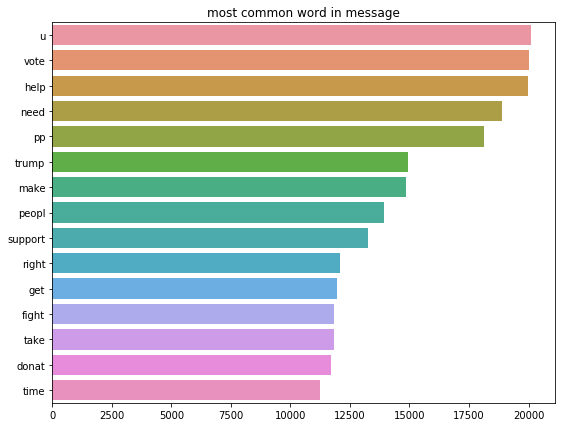

In [17]:
corpus=build_list(text_df,"message")
counter=Counter(corpus)
most=counter.most_common()
WordLib = most
x=[]
y=[]
for word,count in most[:15]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)
plt.title("most common word in message")

In [18]:
WordLib[:100]

[('u', 20087),
 ('vote', 20002),
 ('help', 19995),
 ('need', 18889),
 ('pp', 18119),
 ('trump', 14934),
 ('make', 14847),
 ('peopl', 13924),
 ('support', 13274),
 ('right', 12091),
 ('get', 11963),
 ('fight', 11850),
 ('take', 11825),
 ('donat', 11699),
 ('time', 11236),
 ('elect', 10345),
 ('like', 10008),
 ('class58cl', 9491),
 ('5afzspanspan', 9491),
 ('work', 9487),
 ('class5afxspan', 9472),
 ('protect', 9429),
 ('span', 9075),
 ('one', 8475),
 ('campaign', 8451),
 ('state', 8333),
 ('today', 8250),
 ('senat', 8047),
 ('sign', 7951),
 ('back', 7928),
 ('year', 7838),
 ('day', 7795),
 ('join', 7576),
 ('new', 7352),
 ('congress', 7226),
 ('democrat', 7094),
 ('go', 7064),
 ('class58cnspan', 7023),
 ('plea', 6884),
 ('care', 6854),
 ('want', 6844),
 ('famili', 6823),
 ('presid', 6801),
 ('know', 6735),
 ('republican', 6585),
 ('stand', 6410),
 ('american', 6304),
 ('everi', 6161),
 ('give', 5644),
 ('would', 5638),
 ('win', 5563),
 ('let', 5503),
 ('stop', 5482),
 ('name', 5446),
 ('

In [19]:
# WordLib[1][0]
# from pandas.core.frame import DataFrame
# Wordsdf = []
# for i in range(100):
#     Worddf = DataFrame(WordLib[i][0])
#     Wordsdf = pd.concat(objs=[Wordsdf,Worddf], axis=1)

In [20]:
def plot_count(feature, title,df, size=1, show_percents=False):
    f, ax = plt.subplots(1,1, figsize=(4*size, 4))
    total = float(len(df))
    g = sns.countplot(df[feature],order = df[feature].value_counts().index[0:20], palette='Set3')
    g.set_title("Number of {}".format(title))
    if (size > 2):
        plt.xticks(rotation=90, size=10)
    if(show_percents):
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2.,
                   height + 3, '{:1.2f}%'.format(100*height/total),
                   ha="center")
    ax.set_xticklabels(ax.get_xticklabels());
    plt.show()

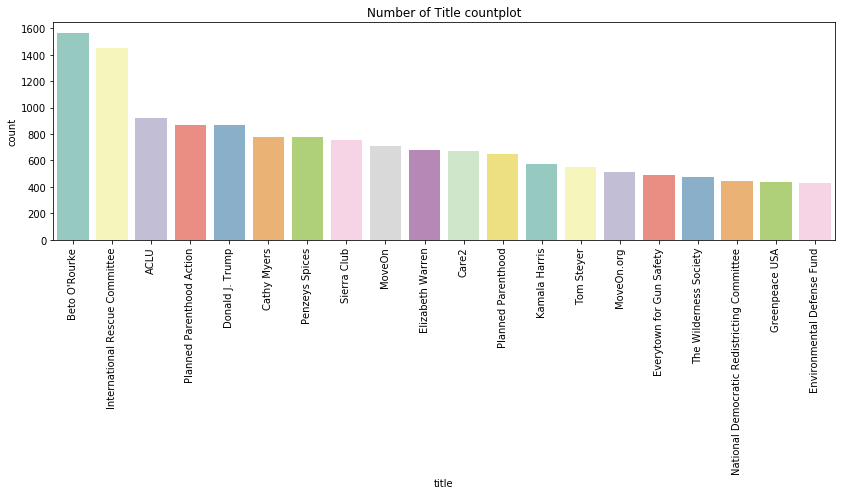

In [21]:
plot_count('title','Title countplot', text_df, 3.5)

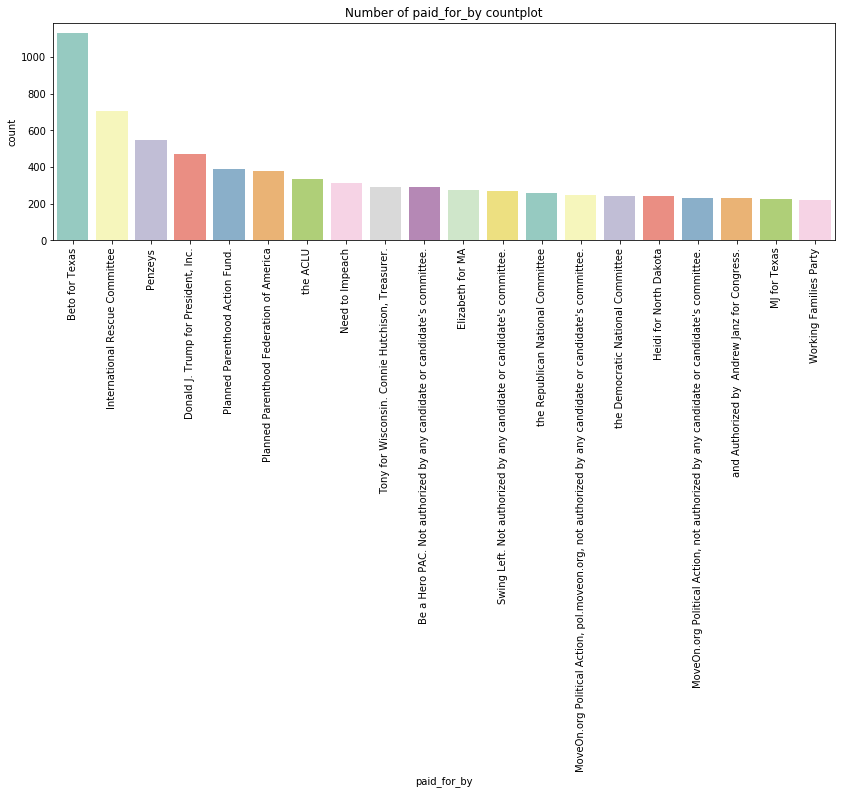

In [22]:
plot_count('paid_for_by','paid_for_by countplot', text_df, 3.5)

In [23]:
def clean(text):
    text = text.fillna("fillna").str.lower()
    text = text.map(lambda x: re.sub('\\n',' ',str(x)))
    text = text.map(lambda x: re.sub("\[\[User.*",'',str(x)))
    text = text.map(lambda x: re.sub("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'',str(x)))
    text = text.map(lambda x: re.sub("\(http://.*?\s\(http://.*\)",'',str(x)))
    return text

In [24]:
text_df['title'] = clean(text_df['title'])
text_df['message'] = clean(text_df['message'])
text_df['paid_for_by'] = clean(text_df['paid_for_by'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [25]:
stemmer = PorterStemmer()
def stem_text(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = stemmer.stem(i.strip())
            final_text.append(word)
    return " ".join(finan_text)

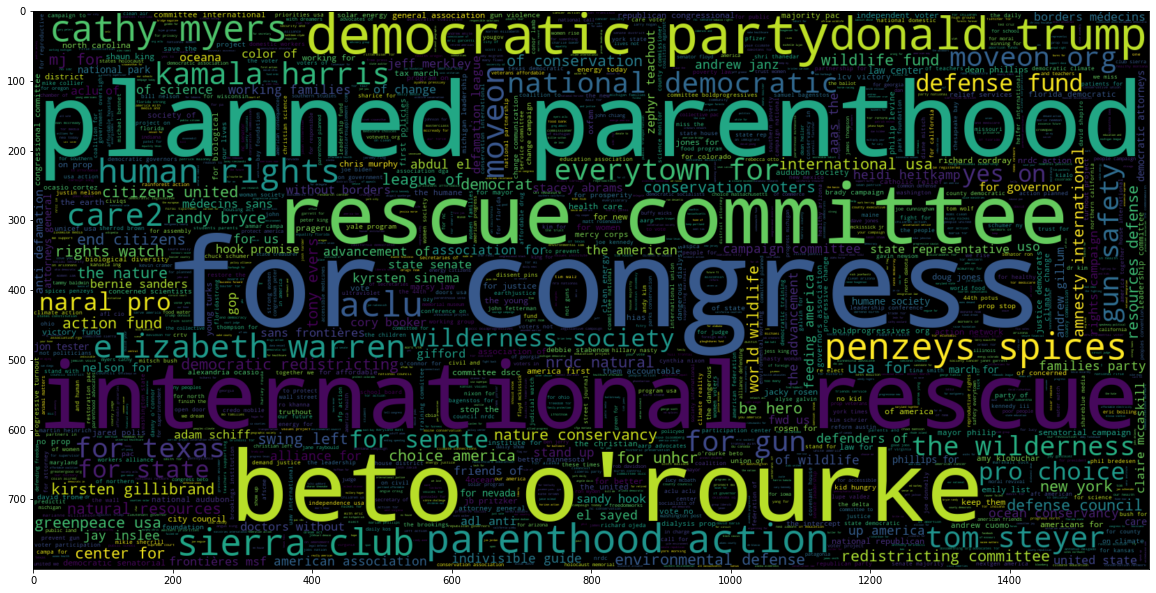

In [26]:
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words=1500, width=1600,height = 800 , stopwords = STOPWORDS).generate(" ".join(text_df.title))
plt.imshow(wc , interpolation = 'bilinear')

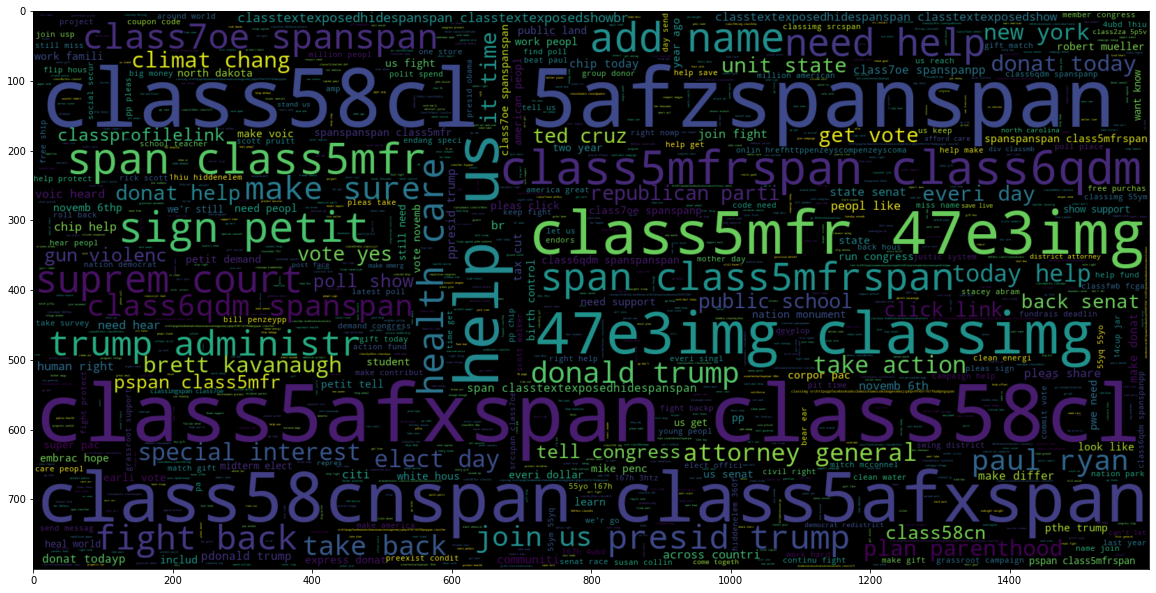

In [27]:
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words=1500, width=1600,height = 800 , stopwords = STOPWORDS).generate(" ".join(text_df.message))
plt.imshow(wc , interpolation = 'bilinear')

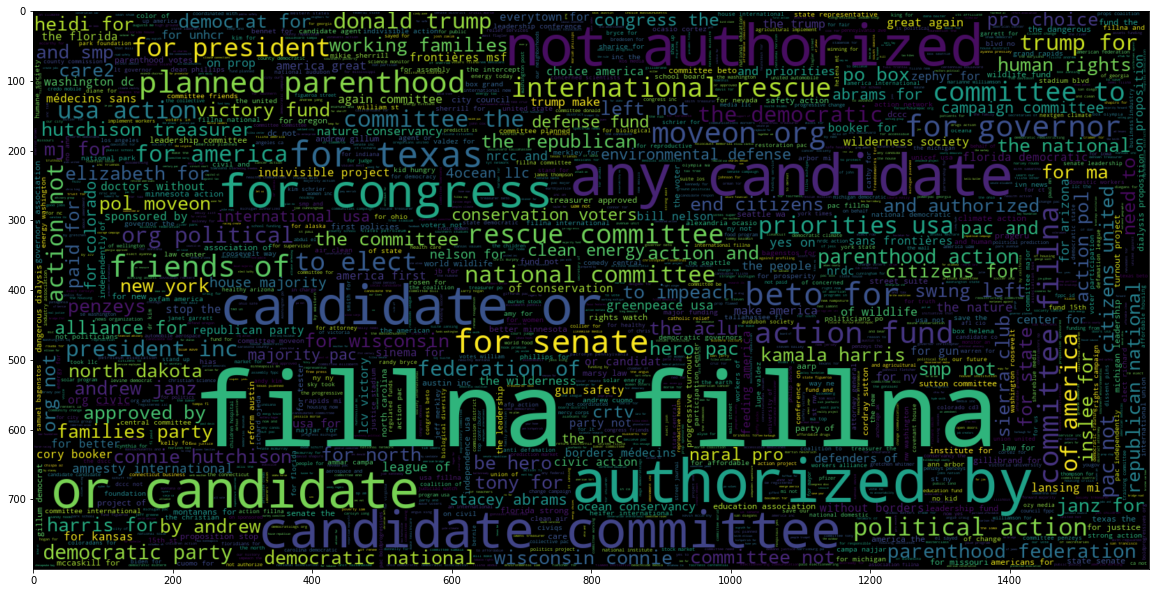

In [28]:
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words=1500, width=1600,height = 800 , stopwords = STOPWORDS).generate(" ".join(text_df.paid_for_by))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
import spacy 
nlp = spacy.load('en_core_web_lg')

In [25]:
import en_core_web_lg

C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_lg' (2.0.0) requires spaCy v2.0 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [27]:
x

['pp',
 'help',
 'vote',
 'need',
 'u',
 'make',
 'right',
 'get',
 'trump',
 'peopl',
 'support',
 'donat',
 'time',
 'like',
 'take']

In [28]:
y

[2904,
 2823,
 2738,
 2705,
 2679,
 2012,
 1901,
 1785,
 1775,
 1759,
 1735,
 1698,
 1697,
 1584,
 1578]

In [30]:
documents = text_df["message"].tolist()
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)
count_vector.fit(documents)
count_vector.get_feature_names()
doc_array = count_vector.transform(documents).toarray()
doc_array

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


MemoryError: 

In [ ]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
fe = ["help", "need", "make", "vote", "donat", "support", "get", "peopl", "trump", "right", "fight", "take", "time", "like"
     , "take", "campaign", "elect", "work", "one", "senat", "today", "class5afxspan", "class58cl", "5afzspanspan", "new"
     , "span", "state", "day", "back", "protect", "republican", "go", "year", "know", "plea", "care", "join", "everi"
      , "class58cnspan", "democrat", "presid", "voter", "classimg", "way", "court", "want", "sign", "famili"
     , "polit", "run", "stop", "win", "stand", "class5mfr", "47e3img", "free", "would", "give", "american", "put", "kavanaugh"
     , "congress"]

frequency_matrix = frequency_matrix[fe]

In [ ]:
for i in range (len(df['political_probability'])):
    if df['political_probability'][i] > 0.9:
        df['political_probability'][i] = 1
    else:
        df['political_probability'][i] = 0

In [ ]:
train = pd.concat(objs=[frequency_matrix, df["political_probability"]],axis=1)

In [ ]:
train

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(text_df['message'])
print(features.shape)

In [ ]:
from sklearn.model_selection import train_test_split
print(features.shape)
print(text_df["political_probability"].shape)
X_train, X_test, y_train, y_test = train_test_split(features, text_df["political_probability"], stratify = text_df["political_probability"], test_size = 0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

names = ["K Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression", "SGD Classifier",
         "Naive Bayes", "SVM Linear"]

classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = zip(names, classifiers)

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("\n" + name + ":")
    print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
    print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))
    print("Confusion Matrix:\n") 
    confusion_m = confusion_matrix(y_test, y_pred)
    print(confusion_m)